In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import seaborn as sns
import datetime as dt
import re
%matplotlib inline

In [5]:
# Reading the csv file
a = pd.read_csv('adventure_works_purchase_orders.csv')

In [6]:
a.head()

,SalesOrderNumber,OrderDate,DueDate,ShipDate,Sales_Person,Sales_Region,Sales_Province,Sales_City,Sales_Postal_Code,Customer_Code,Customer_Name,Customer_Region,Customer_Province,Customer_City,Customer_Postal_Code,LineItem_Id,Product_Category,Product_Sub_Category,Product_Name,Product_Code,Unit_Cost,UnitPrice,UnitPriceDiscount,OrderQty,Unit_Freight_Cost
0,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,1,Bikes,Mountain Bikes,"Mountain-100 Black, 42",BK-M82B-42,1898.0944,3374.99,0.0,1,51.3415
1,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,2,Bikes,Mountain Bikes,"Mountain-100 Black, 44",BK-M82B-44,1898.0944,3374.99,0.0,3,51.3415
2,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,3,Bikes,Mountain Bikes,"Mountain-100 Black, 48",BK-M82B-48,1898.0944,3374.99,0.0,1,51.3415
3,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,4,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",BK-M82S-38,1912.1544,3399.99,0.0,1,51.3415
4,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,5,Bikes,Mountain Bikes,"Mountain-100 Silver, 42",BK-M82S-42,1912.1544,3399.99,0.0,1,51.3415


In [7]:
# Finding the null counts
a.isna().sum()

SalesOrderNumber        0
OrderDate               0
DueDate                 0
ShipDate                0
Sales_Person            0
Sales_Region            0
Sales_Province          0
Sales_City              0
Sales_Postal_Code       0
Customer_Code           0
Customer_Name           0
Customer_Region         0
Customer_Province       0
Customer_City           0
Customer_Postal_Code    0
LineItem_Id             0
Product_Category        0
Product_Sub_Category    0
Product_Name            0
Product_Code            0
Unit_Cost               0
UnitPrice               0
UnitPriceDiscount       0
OrderQty                0
Unit_Freight_Cost       0
dtype: int64

In [8]:
# Finding the total counts
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41884 entries, 0 to 41883
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SalesOrderNumber      41884 non-null  object 
 1   OrderDate             41884 non-null  object 
 2   DueDate               41884 non-null  object 
 3   ShipDate              41884 non-null  object 
 4   Sales_Person          41884 non-null  object 
 5   Sales_Region          41884 non-null  object 
 6   Sales_Province        41884 non-null  object 
 7   Sales_City            41884 non-null  object 
 8   Sales_Postal_Code     41884 non-null  int64  
 9   Customer_Code         41884 non-null  object 
 10  Customer_Name         41884 non-null  object 
 11  Customer_Region       41884 non-null  object 
 12  Customer_Province     41884 non-null  object 
 13  Customer_City         41884 non-null  object 
 14  Customer_Postal_Code  41884 non-null  object 
 15  LineItem_Id        

In [9]:
#Understanding the distribution
a.describe()

,Sales_Postal_Code,LineItem_Id,Unit_Cost,UnitPrice,UnitPriceDiscount,OrderQty,Unit_Freight_Cost
count,41884.000000,41884.000000,41884.000000,41884.000000,41884.000000,41884.000000,41884.000000
mean,62247.665314,42411.057683,480.189744,797.107599,0.005290,3.462539,41.917555
std,26180.477600,32307.450041,554.925952,915.681850,0.034575,2.982925,26.273406
min,2139.000000,1.000000,0.856500,2.290000,0.000000,1.000000,0.034400
25%,48226.000000,16647.750000,35.959600,61.920000,0.000000,2.000000,25.984800
50%,55802.000000,32940.500000,294.579700,539.990000,0.000000,3.000000,35.776700
75%,84407.000000,62801.250000,713.079800,1120.490000,0.000000,4.000000,50.405275
max,98055.000000,113563.000000,2171.294200,3578.270000,0.400000,44.000000,274.109100


In [10]:
#Understanding the data type
a.dtypes

SalesOrderNumber         object
OrderDate                object
DueDate                  object
ShipDate                 object
Sales_Person             object
Sales_Region             object
Sales_Province           object
Sales_City               object
Sales_Postal_Code         int64
Customer_Code            object
Customer_Name            object
Customer_Region          object
Customer_Province        object
Customer_City            object
Customer_Postal_Code     object
LineItem_Id               int64
Product_Category         object
Product_Sub_Category     object
Product_Name             object
Product_Code             object
Unit_Cost               float64
UnitPrice               float64
UnitPriceDiscount       float64
OrderQty                  int64
Unit_Freight_Cost       float64
dtype: object

In [11]:
#Creation of additional variables
a['Overall_cost'] = (a['Unit_Cost']*a['OrderQty'])
a['Overall_freight_cost'] = (a['Unit_Freight_Cost']*a['OrderQty'])
a['Overall_sales_price'] = (a['UnitPrice']*a['OrderQty'])
a['Overall_discount'] = (a['UnitPriceDiscount']*a['OrderQty'])

In [12]:
a.head()

,SalesOrderNumber,OrderDate,DueDate,ShipDate,Sales_Person,Sales_Region,Sales_Province,Sales_City,Sales_Postal_Code,Customer_Code,Customer_Name,Customer_Region,Customer_Province,Customer_City,Customer_Postal_Code,LineItem_Id,Product_Category,Product_Sub_Category,Product_Name,Product_Code,Unit_Cost,UnitPrice,UnitPriceDiscount,OrderQty,Unit_Freight_Cost,Overall_cost,Overall_freight_cost,Overall_sales_price,Overall_discount
0,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,1,Bikes,Mountain Bikes,"Mountain-100 Black, 42",BK-M82B-42,1898.0944,3374.99,0.0,1,51.3415,1898.0944,51.3415,3374.99,0.0
1,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,2,Bikes,Mountain Bikes,"Mountain-100 Black, 44",BK-M82B-44,1898.0944,3374.99,0.0,3,51.3415,5694.2832,154.0245,10124.97,0.0
2,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,3,Bikes,Mountain Bikes,"Mountain-100 Black, 48",BK-M82B-48,1898.0944,3374.99,0.0,1,51.3415,1898.0944,51.3415,3374.99,0.0
3,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,4,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",BK-M82S-38,1912.1544,3399.99,0.0,1,51.3415,1912.1544,51.3415,3399.99,0.0
4,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,5,Bikes,Mountain Bikes,"Mountain-100 Silver, 42",BK-M82S-42,1912.1544,3399.99,0.0,1,51.3415,1912.1544,51.3415,3399.99,0.0


In [13]:
# Creation of variables for finding profits
a['Total_cost'] = a['Overall_cost'] + a['Overall_freight_cost']
a['Total_selling_price'] = a['Overall_sales_price'] - a['Overall_discount']
a['Profit'] = a['Total_selling_price'] - a['Total_cost']

In [15]:
a.head()

,SalesOrderNumber,OrderDate,DueDate,ShipDate,Sales_Person,Sales_Region,Sales_Province,Sales_City,Sales_Postal_Code,Customer_Code,Customer_Name,Customer_Region,Customer_Province,Customer_City,Customer_Postal_Code,LineItem_Id,Product_Category,Product_Sub_Category,Product_Name,Product_Code,Unit_Cost,UnitPrice,UnitPriceDiscount,OrderQty,Unit_Freight_Cost,Overall_cost,Overall_freight_cost,Overall_sales_price,Overall_discount,Total_cost,Total_selling_price,Profit
0,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,1,Bikes,Mountain Bikes,"Mountain-100 Black, 42",BK-M82B-42,1898.0944,3374.99,0.0,1,51.3415,1898.0944,51.3415,3374.99,0.0,1949.4359,3374.99,1425.5541
1,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,2,Bikes,Mountain Bikes,"Mountain-100 Black, 44",BK-M82B-44,1898.0944,3374.99,0.0,3,51.3415,5694.2832,154.0245,10124.97,0.0,5848.3077,10124.97,4276.6623
2,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,3,Bikes,Mountain Bikes,"Mountain-100 Black, 48",BK-M82B-48,1898.0944,3374.99,0.0,1,51.3415,1898.0944,51.3415,3374.99,0.0,1949.4359,3374.99,1425.5541
3,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,4,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",BK-M82S-38,1912.1544,3399.99,0.0,1,51.3415,1912.1544,51.3415,3399.99,0.0,1963.4959,3399.99,1436.4941
4,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,5,Bikes,Mountain Bikes,"Mountain-100 Silver, 42",BK-M82S-42,1912.1544,3399.99,0.0,1,51.3415,1912.1544,51.3415,3399.99,0.0,1963.4959,3399.99,1436.4941


In [14]:
a['OrderDate'].unique()

array(['7/1/05', '8/1/05', '9/1/05', '10/1/05', '11/1/05', '12/1/05',
       '1/1/06', '2/1/06', '3/1/06', '4/1/06', '5/1/06', '6/1/06',
       '7/1/06', '8/1/06', '9/1/06', '10/1/06', '11/1/06', '12/1/06',
       '1/1/07', '2/1/07', '3/1/07', '4/1/07', '5/1/07', '6/1/07',
       '7/1/07', '8/1/07', '9/1/07', '10/1/07', '11/1/07', '12/1/07',
       '1/1/08', '2/1/08', '3/1/08', '3/31/08', '4/1/08', '5/1/08',
       '6/1/08'], dtype=object)

In [18]:
a.head()

,SalesOrderNumber,OrderDate,DueDate,ShipDate,Sales_Person,Sales_Region,Sales_Province,Sales_City,Sales_Postal_Code,Customer_Code,Customer_Name,Customer_Region,Customer_Province,Customer_City,Customer_Postal_Code,LineItem_Id,Product_Category,Product_Sub_Category,Product_Name,Product_Code,Unit_Cost,UnitPrice,UnitPriceDiscount,OrderQty,Unit_Freight_Cost,Overall_cost,Overall_freight_cost,Overall_sales_price,Overall_discount,Total_cost,Total_selling_price,Profit
0,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,1,Bikes,Mountain Bikes,"Mountain-100 Black, 42",BK-M82B-42,1898.0944,3374.99,0.0,1,51.3415,1898.0944,51.3415,3374.99,0.0,1949.4359,3374.99,1425.5541
1,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,2,Bikes,Mountain Bikes,"Mountain-100 Black, 44",BK-M82B-44,1898.0944,3374.99,0.0,3,51.3415,5694.2832,154.0245,10124.97,0.0,5848.3077,10124.97,4276.6623
2,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,3,Bikes,Mountain Bikes,"Mountain-100 Black, 48",BK-M82B-48,1898.0944,3374.99,0.0,1,51.3415,1898.0944,51.3415,3374.99,0.0,1949.4359,3374.99,1425.5541
3,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,4,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",BK-M82S-38,1912.1544,3399.99,0.0,1,51.3415,1912.1544,51.3415,3399.99,0.0,1963.4959,3399.99,1436.4941
4,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,5,Bikes,Mountain Bikes,"Mountain-100 Silver, 42",BK-M82S-42,1912.1544,3399.99,0.0,1,51.3415,1912.1544,51.3415,3399.99,0.0,1963.4959,3399.99,1436.4941


In [28]:
a.dtypes

SalesOrderNumber                object
OrderDate                       object
DueDate                         object
ShipDate                        object
Sales_Person                    object
Sales_Region                    object
Sales_Province                  object
Sales_City                      object
Sales_Postal_Code                int64
Customer_Code                   object
Customer_Name                   object
Customer_Region                 object
Customer_Province               object
Customer_City                   object
Customer_Postal_Code            object
LineItem_Id                      int64
Product_Category                object
Product_Sub_Category            object
Product_Name                    object
Product_Code                    object
Unit_Cost                      float64
UnitPrice                      float64
UnitPriceDiscount              float64
OrderQty                         int64
Unit_Freight_Cost              float64
Overall_cost             

In [21]:
a['month_year'] = pd.to_datetime(a['OrderDate']).dt.to_period('M')

In [22]:
a.head()

,SalesOrderNumber,OrderDate,DueDate,ShipDate,Sales_Person,Sales_Region,Sales_Province,Sales_City,Sales_Postal_Code,Customer_Code,Customer_Name,Customer_Region,Customer_Province,Customer_City,Customer_Postal_Code,LineItem_Id,Product_Category,Product_Sub_Category,Product_Name,Product_Code,Unit_Cost,UnitPrice,UnitPriceDiscount,OrderQty,Unit_Freight_Cost,Overall_cost,Overall_freight_cost,Overall_sales_price,Overall_discount,Total_cost,Total_selling_price,Profit,month_year
0,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,1,Bikes,Mountain Bikes,"Mountain-100 Black, 42",BK-M82B-42,1898.0944,3374.99,0.0,1,51.3415,1898.0944,51.3415,3374.99,0.0,1949.4359,3374.99,1425.5541,2005-07
1,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,2,Bikes,Mountain Bikes,"Mountain-100 Black, 44",BK-M82B-44,1898.0944,3374.99,0.0,3,51.3415,5694.2832,154.0245,10124.97,0.0,5848.3077,10124.97,4276.6623,2005-07
2,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,3,Bikes,Mountain Bikes,"Mountain-100 Black, 48",BK-M82B-48,1898.0944,3374.99,0.0,1,51.3415,1898.0944,51.3415,3374.99,0.0,1949.4359,3374.99,1425.5541,2005-07
3,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,4,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",BK-M82S-38,1912.1544,3399.99,0.0,1,51.3415,1912.1544,51.3415,3399.99,0.0,1963.4959,3399.99,1436.4941,2005-07
4,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,5,Bikes,Mountain Bikes,"Mountain-100 Silver, 42",BK-M82S-42,1912.1544,3399.99,0.0,1,51.3415,1912.1544,51.3415,3399.99,0.0,1963.4959,3399.99,1436.4941,2005-07


In [24]:
a[a['OrderDate'] == '3/1/08'].shape
a[a['month_year'] == '2008-03'].shape

(1289, 33)

In [25]:
a.shape

(41884, 33)

In [26]:
#Checking for duplicate rows
b= a[a.duplicated()]
b

,SalesOrderNumber,OrderDate,DueDate,ShipDate,Sales_Person,Sales_Region,Sales_Province,Sales_City,Sales_Postal_Code,Customer_Code,Customer_Name,Customer_Region,Customer_Province,Customer_City,Customer_Postal_Code,LineItem_Id,Product_Category,Product_Sub_Category,Product_Name,Product_Code,Unit_Cost,UnitPrice,UnitPriceDiscount,OrderQty,Unit_Freight_Cost,Overall_cost,Overall_freight_cost,Overall_sales_price,Overall_discount,Total_cost,Total_selling_price,Profit,month_year


In [58]:
a.to_pickle('a.pkl')

In [27]:
a.head()

,SalesOrderNumber,OrderDate,DueDate,ShipDate,Sales_Person,Sales_Region,Sales_Province,Sales_City,Sales_Postal_Code,Customer_Code,Customer_Name,Customer_Region,Customer_Province,Customer_City,Customer_Postal_Code,LineItem_Id,Product_Category,Product_Sub_Category,Product_Name,Product_Code,Unit_Cost,UnitPrice,UnitPriceDiscount,OrderQty,Unit_Freight_Cost,Overall_cost,Overall_freight_cost,Overall_sales_price,Overall_discount,Total_cost,Total_selling_price,Profit,month_year
0,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,1,Bikes,Mountain Bikes,"Mountain-100 Black, 42",BK-M82B-42,1898.0944,3374.99,0.0,1,51.3415,1898.0944,51.3415,3374.99,0.0,1949.4359,3374.99,1425.5541,2005-07
1,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,2,Bikes,Mountain Bikes,"Mountain-100 Black, 44",BK-M82B-44,1898.0944,3374.99,0.0,3,51.3415,5694.2832,154.0245,10124.97,0.0,5848.3077,10124.97,4276.6623,2005-07
2,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,3,Bikes,Mountain Bikes,"Mountain-100 Black, 48",BK-M82B-48,1898.0944,3374.99,0.0,1,51.3415,1898.0944,51.3415,3374.99,0.0,1949.4359,3374.99,1425.5541,2005-07
3,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,4,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",BK-M82S-38,1912.1544,3399.99,0.0,1,51.3415,1912.1544,51.3415,3399.99,0.0,1963.4959,3399.99,1436.4941,2005-07
4,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,5,Bikes,Mountain Bikes,"Mountain-100 Silver, 42",BK-M82S-42,1912.1544,3399.99,0.0,1,51.3415,1912.1544,51.3415,3399.99,0.0,1963.4959,3399.99,1436.4941,2005-07


In [28]:
#Aggregation as per months
a1 = a.groupby('month_year').agg({'Total_cost':np.sum,'Total_selling_price':np.sum,'Profit':np.sum}).reset_index()

In [29]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [30]:
a1.head()

,month_year,Total_cost,Total_selling_price,Profit
0,2005-07,400358.74770,638871.55000,238512.80230
1,2005-08,1308098.71410,2080422.11000,772323.39590
2,2005-09,1021535.35360,1634330.90000,612795.54640
3,2005-10,663195.22110,1041962.06000,378766.83890
4,2005-11,2097667.00020,3302630.32000,1204963.31980


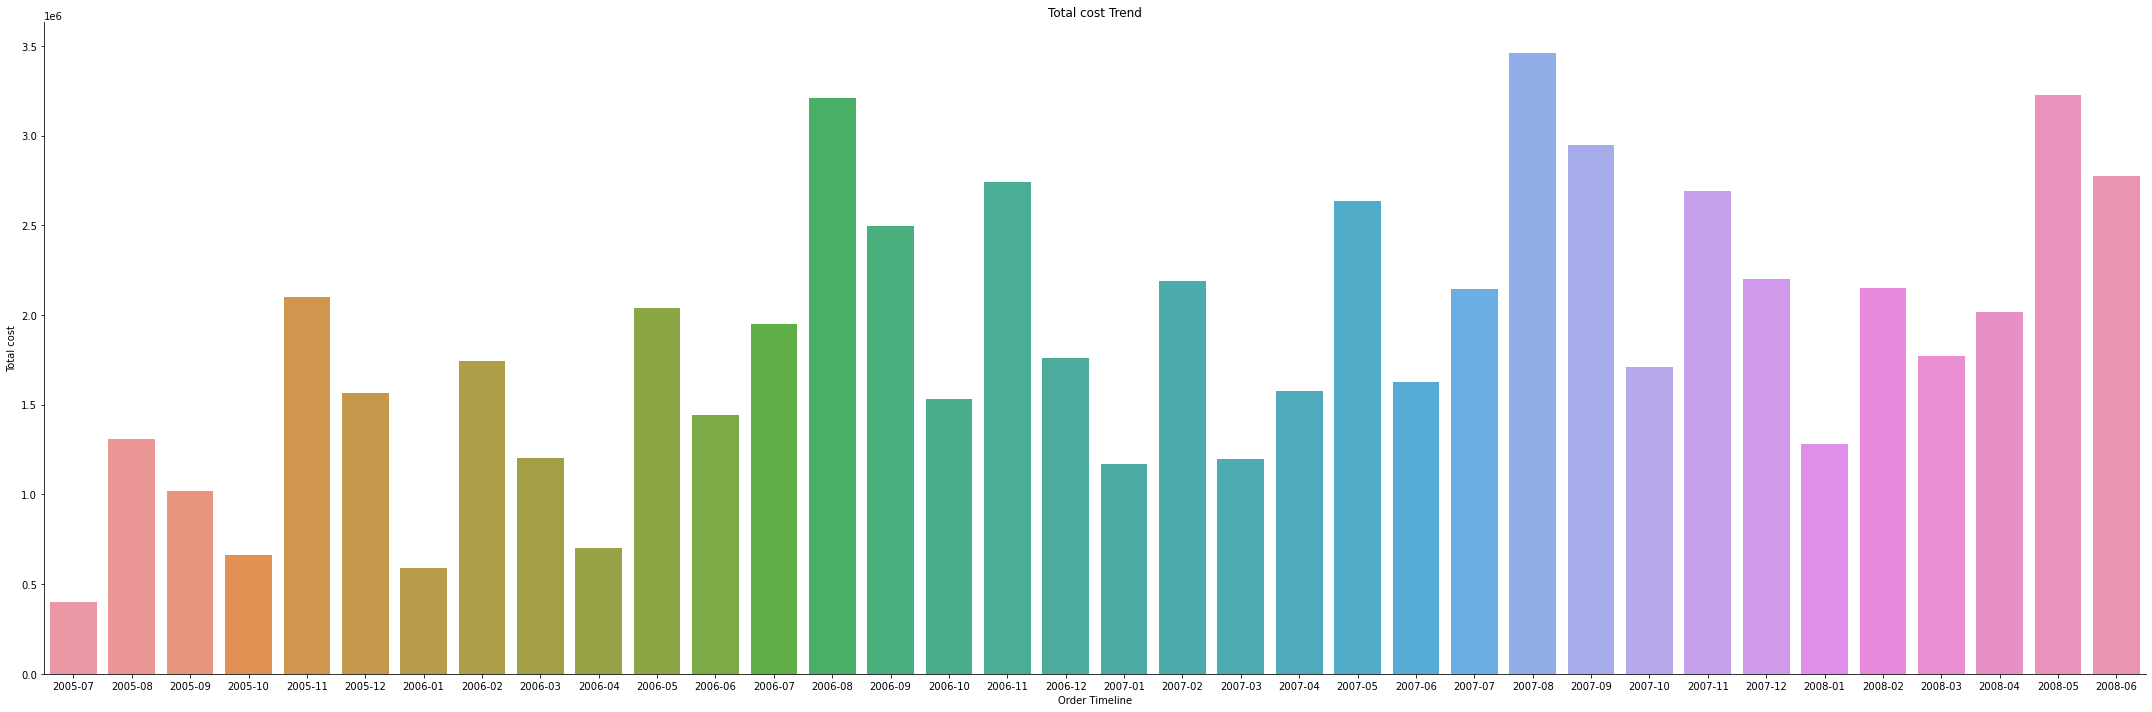

In [31]:
#Understanding the cost trend
plt.figure(figsize = (30,10))
ax = sns.barplot(x = 'month_year', y = 'Total_cost', ci = None, data = a1) #, order = ['0','1','2','> 3'])
sns.despine(right = True, top = True)
plt.xlabel('Order Timeline')
plt.ylabel('Total cost')
plt.title('Total cost Trend')
plt.tight_layout()
plt.show()

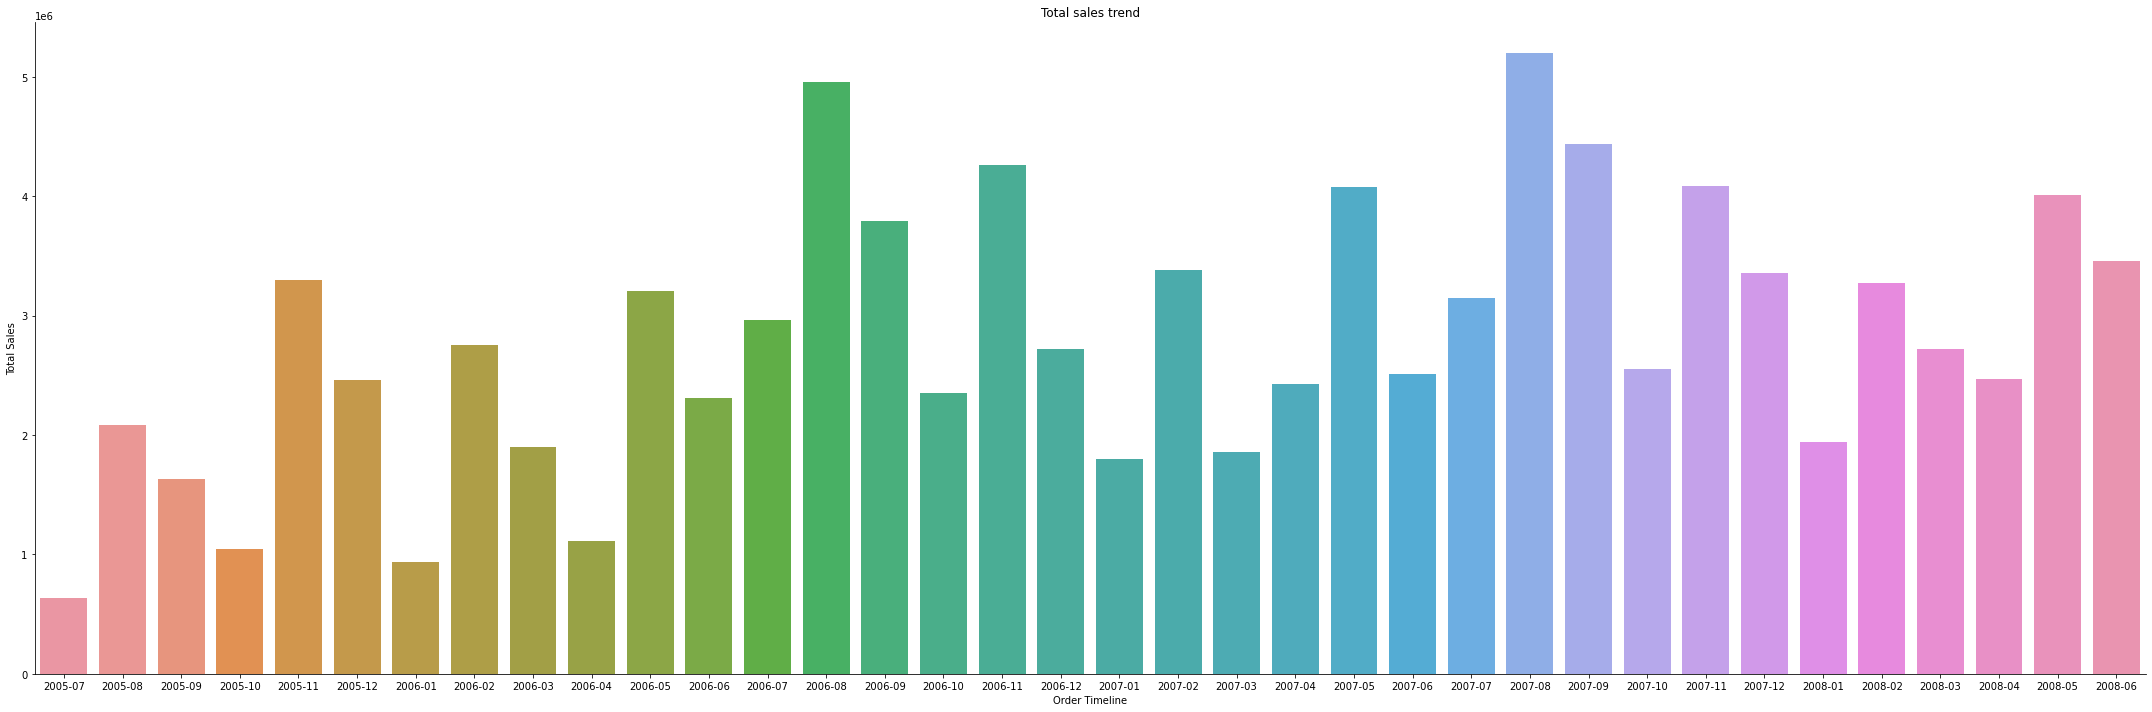

In [137]:
#Understanding the sales trend
plt.figure(figsize = (30,10))
ax = sns.barplot(x = 'month_year', y = 'Total_selling_price', ci = None, data = a1) #, order = ['0','1','2','> 3'])
sns.despine(right = True, top = True)
plt.xlabel('Order Timeline')
plt.ylabel('Total Sales')
plt.title('Total sales trend')
plt.tight_layout()
plt.show()

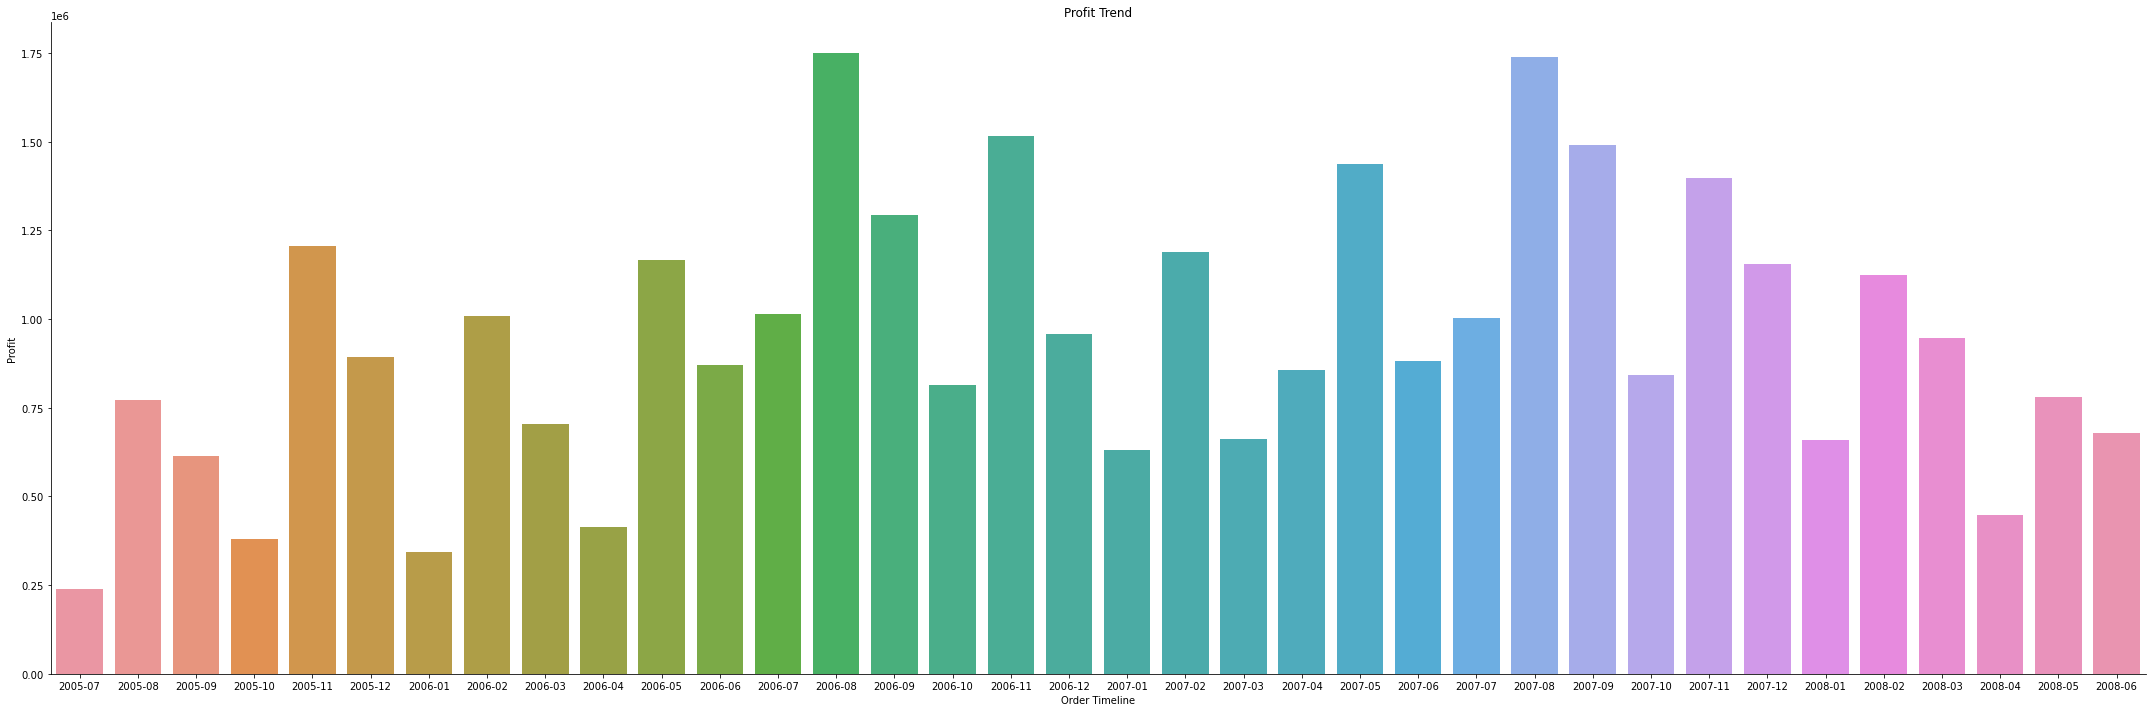

In [33]:
#Understanding the Profits
plt.figure(figsize = (30,10))
ax = sns.barplot(x = 'month_year', y = 'Profit', ci = None, data = a1) #, order = ['0','1','2','> 3'])
sns.despine(right = True, top = True)
plt.xlabel('Order Timeline')
plt.ylabel('Profit')
plt.title('Profit Trend')
plt.tight_layout()
plt.show()

In [34]:
a1['pct_change'] = a1['Profit'].pct_change()

In [35]:
a1

,month_year,Total_cost,Total_selling_price,Profit,pct_change
0,2005-07,400358.74770,638871.55000,238512.80230,NaN
1,2005-08,1308098.71410,2080422.11000,772323.39590,2.23808
2,2005-09,1021535.35360,1634330.90000,612795.54640,-0.20656
3,2005-10,663195.22110,1041962.06000,378766.83890,-0.38190
4,2005-11,2097667.00020,3302630.32000,1204963.31980,2.18128
5,2005-12,1567367.85780,2460979.04000,893611.18220,-0.25839
6,2006-01,589412.04750,933633.85000,344221.80250,-0.61480
7,2006-02,1745736.71420,2754468.66000,1008731.94580,1.93047
8,2006-03,1200749.24440,1903974.68000,703225.43560,-0.30286
9,2006-04,702583.23380,1116135.23000,413551.99620,-0.41192


In [36]:
a['Product_Category'].unique()

array(['Bikes', 'Clothing', 'Accessories', 'Components'], dtype=object)

In [37]:
# Aggregation basis product_category
a2 = a.groupby(['month_year','Product_Category']).agg({'Total_cost':np.sum,'Total_selling_price':np.sum,'Profit':np.sum}).reset_index()

In [38]:
a2.head(20)

,month_year,Product_Category,Total_cost,Total_selling_price,Profit
0,2005-07,Accessories,3493.21670,2414.31000,-1078.90670
1,2005-07,Bikes,368709.24880,602904.02000,234194.77120
2,2005-07,Clothing,8590.31270,3693.61000,-4896.70270
3,2005-07,Components,19565.96950,29859.61000,10293.64050
4,2005-08,Accessories,11318.22890,4758.64000,-6559.58890
5,2005-08,Bikes,1154758.63210,1897582.01000,742823.37790
6,2005-08,Clothing,35333.72670,9974.52000,-25359.20670
7,2005-08,Components,106688.12640,168106.94000,61418.81360
8,2005-09,Accessories,7826.22460,4058.84000,-3767.38460
9,2005-09,Bikes,899394.64230,1476327.64000,576932.99770


In [39]:
a.head()

,SalesOrderNumber,OrderDate,DueDate,ShipDate,Sales_Person,Sales_Region,Sales_Province,Sales_City,Sales_Postal_Code,Customer_Code,Customer_Name,Customer_Region,Customer_Province,Customer_City,Customer_Postal_Code,LineItem_Id,Product_Category,Product_Sub_Category,Product_Name,Product_Code,Unit_Cost,UnitPrice,UnitPriceDiscount,OrderQty,Unit_Freight_Cost,Overall_cost,Overall_freight_cost,Overall_sales_price,Overall_discount,Total_cost,Total_selling_price,Profit,month_year
0,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,1,Bikes,Mountain Bikes,"Mountain-100 Black, 42",BK-M82B-42,1898.09440,3374.99000,0.00000,1,51.34150,1898.09440,51.34150,3374.99000,0.00000,1949.43590,3374.99000,1425.55410,2005-07
1,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,2,Bikes,Mountain Bikes,"Mountain-100 Black, 44",BK-M82B-44,1898.09440,3374.99000,0.00000,3,51.34150,5694.28320,154.02450,10124.97000,0.00000,5848.30770,10124.97000,4276.66230,2005-07
2,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,3,Bikes,Mountain Bikes,"Mountain-100 Black, 48",BK-M82B-48,1898.09440,3374.99000,0.00000,1,51.34150,1898.09440,51.34150,3374.99000,0.00000,1949.43590,3374.99000,1425.55410,2005-07
3,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,4,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",BK-M82S-38,1912.15440,3399.99000,0.00000,1,51.34150,1912.15440,51.34150,3399.99000,0.00000,1963.49590,3399.99000,1436.49410,2005-07
4,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,5,Bikes,Mountain Bikes,"Mountain-100 Silver, 42",BK-M82S-42,1912.15440,3399.99000,0.00000,1,51.34150,1912.15440,51.34150,3399.99000,0.00000,1963.49590,3399.99000,1436.49410,2005-07


In [40]:
# Creating year column
a['OrderDate'] = pd.to_datetime(a['OrderDate'])
a['order_yr'] = a['OrderDate'].dt.year
a['order_mnth'] = a['OrderDate'].dt.month

In [41]:
#Defining the month
a['mnth'] = ['Jan' if x == 1 else
             'Feb' if x == 2 else
             'Mar' if x == 3 else
             'Apr' if x == 4 else
             'May' if x == 5 else
             'Jun' if x == 6 else
             'Jul' if x == 7 else
             'Aug' if x == 8 else
             'Sep' if x == 9 else
             'Oct' if x == 10 else
             'Nov' if x == 11 else
             'Dec' for x in a['order_mnth']]

In [42]:
# set categorical order
a['mnth'] = pd.Categorical(a['mnth'],
                                   categories=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
                                   ordered=True)

In [43]:
a.head()

,SalesOrderNumber,OrderDate,DueDate,ShipDate,Sales_Person,Sales_Region,Sales_Province,Sales_City,Sales_Postal_Code,Customer_Code,Customer_Name,Customer_Region,Customer_Province,Customer_City,Customer_Postal_Code,LineItem_Id,Product_Category,Product_Sub_Category,Product_Name,Product_Code,Unit_Cost,UnitPrice,UnitPriceDiscount,OrderQty,Unit_Freight_Cost,Overall_cost,Overall_freight_cost,Overall_sales_price,Overall_discount,Total_cost,Total_selling_price,Profit,month_year,order_yr,order_mnth,mnth
0,SO43659,2005-07-01,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,1,Bikes,Mountain Bikes,"Mountain-100 Black, 42",BK-M82B-42,1898.09440,3374.99000,0.00000,1,51.34150,1898.09440,51.34150,3374.99000,0.00000,1949.43590,3374.99000,1425.55410,2005-07,2005,7,Jul
1,SO43659,2005-07-01,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,2,Bikes,Mountain Bikes,"Mountain-100 Black, 44",BK-M82B-44,1898.09440,3374.99000,0.00000,3,51.34150,5694.28320,154.02450,10124.97000,0.00000,5848.30770,10124.97000,4276.66230,2005-07,2005,7,Jul
2,SO43659,2005-07-01,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,3,Bikes,Mountain Bikes,"Mountain-100 Black, 48",BK-M82B-48,1898.09440,3374.99000,0.00000,1,51.34150,1898.09440,51.34150,3374.99000,0.00000,1949.43590,3374.99000,1425.55410,2005-07,2005,7,Jul
3,SO43659,2005-07-01,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,4,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",BK-M82S-38,1912.15440,3399.99000,0.00000,1,51.34150,1912.15440,51.34150,3399.99000,0.00000,1963.49590,3399.99000,1436.49410,2005-07,2005,7,Jul
4,SO43659,2005-07-01,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,5,Bikes,Mountain Bikes,"Mountain-100 Silver, 42",BK-M82S-42,1912.15440,3399.99000,0.00000,1,51.34150,1912.15440,51.34150,3399.99000,0.00000,1963.49590,3399.99000,1436.49410,2005-07,2005,7,Jul


In [44]:
# new profit, cost etc variable in millions

a['Total_cost_mm'] = a['Total_cost'] / (10**6)
a['Total_selling_price_mm'] = a['Total_selling_price'] /(10**6)
a['Profit_mm'] = a['Profit'] / (10**6)
a.head()

,SalesOrderNumber,OrderDate,DueDate,ShipDate,Sales_Person,Sales_Region,Sales_Province,Sales_City,Sales_Postal_Code,Customer_Code,Customer_Name,Customer_Region,Customer_Province,Customer_City,Customer_Postal_Code,LineItem_Id,Product_Category,Product_Sub_Category,Product_Name,Product_Code,Unit_Cost,UnitPrice,UnitPriceDiscount,OrderQty,Unit_Freight_Cost,Overall_cost,Overall_freight_cost,Overall_sales_price,Overall_discount,Total_cost,Total_selling_price,Profit,month_year,order_yr,order_mnth,mnth,Total_cost_mm,Total_selling_price_mm,Profit_mm
0,SO43659,2005-07-01,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,1,Bikes,Mountain Bikes,"Mountain-100 Black, 42",BK-M82B-42,1898.09440,3374.99000,0.00000,1,51.34150,1898.09440,51.34150,3374.99000,0.00000,1949.43590,3374.99000,1425.55410,2005-07,2005,7,Jul,0.00195,0.00337,0.00143
1,SO43659,2005-07-01,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,2,Bikes,Mountain Bikes,"Mountain-100 Black, 44",BK-M82B-44,1898.09440,3374.99000,0.00000,3,51.34150,5694.28320,154.02450,10124.97000,0.00000,5848.30770,10124.97000,4276.66230,2005-07,2005,7,Jul,0.00585,0.01012,0.00428
2,SO43659,2005-07-01,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,3,Bikes,Mountain Bikes,"Mountain-100 Black, 48",BK-M82B-48,1898.09440,3374.99000,0.00000,1,51.34150,1898.09440,51.34150,3374.99000,0.00000,1949.43590,3374.99000,1425.55410,2005-07,2005,7,Jul,0.00195,0.00337,0.00143
3,SO43659,2005-07-01,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,4,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",BK-M82S-38,1912.15440,3399.99000,0.00000,1,51.34150,1912.15440,51.34150,3399.99000,0.00000,1963.49590,3399.99000,1436.49410,2005-07,2005,7,Jul,0.00196,0.00340,0.00144
4,SO43659,2005-07-01,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,5,Bikes,Mountain Bikes,"Mountain-100 Silver, 42",BK-M82S-42,1912.15440,3399.99000,0.00000,1,51.34150,1912.15440,51.34150,3399.99000,0.00000,1963.49590,3399.99000,1436.49410,2005-07,2005,7,Jul,0.00196,0.00340,0.00144


In [45]:
# new profit, cost etc variable in thousands

a['Total_cost_k'] = a['Total_cost'] / (1000)
a['Total_selling_price_k'] = a['Total_selling_price'] /(1000)
a['Profit_k'] = a['Profit'] / (1000)
a.head()

,SalesOrderNumber,OrderDate,DueDate,ShipDate,Sales_Person,Sales_Region,Sales_Province,Sales_City,Sales_Postal_Code,Customer_Code,Customer_Name,Customer_Region,Customer_Province,Customer_City,Customer_Postal_Code,LineItem_Id,Product_Category,Product_Sub_Category,Product_Name,Product_Code,Unit_Cost,UnitPrice,UnitPriceDiscount,OrderQty,Unit_Freight_Cost,Overall_cost,Overall_freight_cost,Overall_sales_price,Overall_discount,Total_cost,Total_selling_price,Profit,month_year,order_yr,order_mnth,mnth,Total_cost_mm,Total_selling_price_mm,Profit_mm,Total_cost_k,Total_selling_price_k,Profit_k
0,SO43659,2005-07-01,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,1,Bikes,Mountain Bikes,"Mountain-100 Black, 42",BK-M82B-42,1898.09440,3374.99000,0.00000,1,51.34150,1898.09440,51.34150,3374.99000,0.00000,1949.43590,3374.99000,1425.55410,2005-07,2005,7,Jul,0.00195,0.00337,0.00143,1.94944,3.37499,1.42555
1,SO43659,2005-07-01,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,2,Bikes,Mountain Bikes,"Mountain-100 Black, 44",BK-M82B-44,1898.09440,3374.99000,0.00000,3,51.34150,5694.28320,154.02450,10124.97000,0.00000,5848.30770,10124.97000,4276.66230,2005-07,2005,7,Jul,0.00585,0.01012,0.00428,5.84831,10.12497,4.27666
2,SO43659,2005-07-01,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,3,Bikes,Mountain Bikes,"Mountain-100 Black, 48",BK-M82B-48,1898.09440,3374.99000,0.00000,1,51.34150,1898.09440,51.34150,3374.99000,0.00000,1949.43590,3374.99000,1425.55410,2005-07,2005,7,Jul,0.00195,0.00337,0.00143,1.94944,3.37499,1.42555
3,SO43659,2005-07-01,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,4,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",BK-M82S-38,1912.15440,3399.99000,0.00000,1,51.34150,1912.15440,51.34150,3399.99000,0.00000,1963.49590,3399.99000,1436.49410,2005-07,2005,7,Jul,0.00196,0.00340,0.00144,1.96350,3.39999,1.43649
4,SO43659,2005-07-01,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,5,Bikes,Mountain Bikes,"Mountain-100 Silver, 42",BK-M82S-42,1912.15440,3399.99000,0.00000,1,51.34150,1912.15440,51.34150,3399.99000,0.00000,1963.49590,3399.99000,1436.49410,2005-07,2005,7,Jul,0.00196,0.00340,0.00144,1.96350,3.39999,1.43649


In [56]:
# Sales Country & date

a.groupby(['order_yr','month_year']).agg({'Profit':lambda x : sum(x)/1000000})

Profit
order_yr month_year        
2005     2005-07    0.23851
         2005-08    0.77232
         2005-09    0.61280
         2005-10    0.37877
         2005-11    1.20496
         2005-12    0.89361
2006     2006-01    0.34422
         2006-02    1.00873
         2006-03    0.70323
         2006-04    0.41355
         2006-05    1.16804
         2006-06    0.87081
         2006-07    1.01498
         2006-08    1.74915
         2006-09    1.29472
         2006-10    0.81522
         2006-11    1.51696
         2006-12    0.95899
2007     2007-01    0.63116
         2007-02    1.18886
         2007-03    0.66253
         2007-04    0.85762
         2007-05    1.43715
         2007-06    0.88279
         2007-07    1.00450
         2007-08    1.73910
         2007-09    1.49189
         2007-10    0.84386
         2007-11    1.39707
         2007-12    1.15559
2008     2008-01    0.65954
         2008-02    1.12547
         2008-03    0.94774
         2008-04    0.44809
         2008-05    0.78090
         2008-06    0.67947

In [57]:
# Sales Country & date

gp1 = a.groupby(['order_yr','mnth']).agg({'Profit_k':'sum'}).reset_index()

In [58]:
gp1.head()

,order_yr,mnth,Profit_k
0,2005,Jan,0.00000
1,2005,Feb,0.00000
2,2005,Mar,0.00000
3,2005,Apr,0.00000
4,2005,May,0.00000


In [59]:
gp1 = gp1[gp1['order_yr'] != 2005]

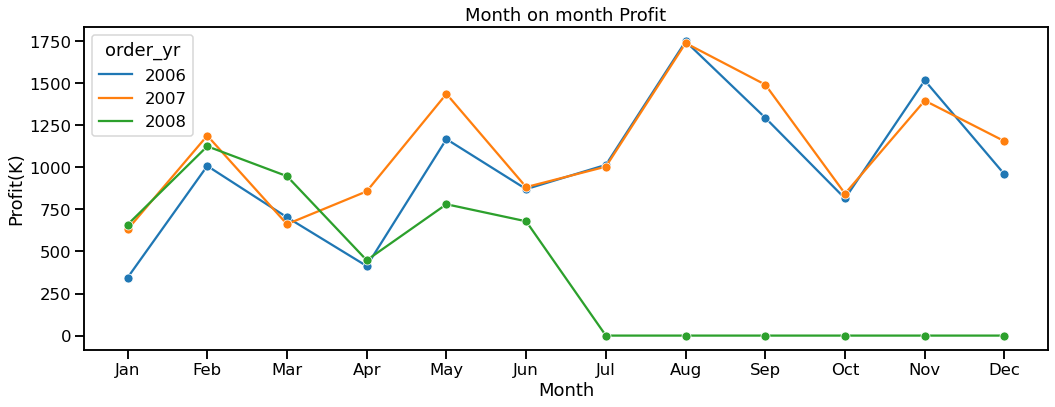

In [60]:
sns.set_context('talk')
plt.figure(figsize = (15,6))
ax = sns.lineplot(x = 'mnth', y = 'Profit_k', hue="order_yr", ci = None, data = gp1, \
                  palette = "tab10", marker = 'o')
# ax.bar_label(ax.containers[0])
# set the ticks
# plt.xticks(rotation=45)
# sns.despine(right = True, top = True)
# ,
plt.xlabel('Month')
plt.ylabel('Profit(K)')
plt.title('Month on month Profit')
plt.tight_layout()
plt.show()

In [61]:
# Month-wise profit comparison of 6 months
piv_gp_1 = gp1[gp1.mnth.isin(['Jan','Feb','Mar','Apr','May','Jun'])]. \
pivot_table(index = 'mnth', columns = 'order_yr', values = 'Profit_k', aggfunc = 'first').reset_index()

In [62]:
piv_gp_1

order_yr,mnth,2006,2007,2008
0,Jan,344.22180,631.15888,659.53816
1,Feb,1008.73195,1188.86284,1125.47407
2,Mar,703.22544,662.53457,947.73620
3,Apr,413.55200,857.62095,448.08510
4,May,1168.03664,1437.15027,780.90423
5,Jun,870.80586,882.79154,679.47134


In [ ]:
#yearly rev, cost & profit

In [63]:
a.head()

,SalesOrderNumber,OrderDate,DueDate,ShipDate,Sales_Person,Sales_Region,Sales_Province,Sales_City,Sales_Postal_Code,Customer_Code,Customer_Name,Customer_Region,Customer_Province,Customer_City,Customer_Postal_Code,LineItem_Id,Product_Category,Product_Sub_Category,Product_Name,Product_Code,Unit_Cost,UnitPrice,UnitPriceDiscount,OrderQty,Unit_Freight_Cost,Overall_cost,Overall_freight_cost,Overall_sales_price,Overall_discount,Total_cost,Total_selling_price,Profit,month_year,order_yr,order_mnth,mnth,Total_cost_mm,Total_selling_price_mm,Profit_mm,Total_cost_k,Total_selling_price_k,Profit_k
0,SO43659,2005-07-01,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,1,Bikes,Mountain Bikes,"Mountain-100 Black, 42",BK-M82B-42,1898.09440,3374.99000,0.00000,1,51.34150,1898.09440,51.34150,3374.99000,0.00000,1949.43590,3374.99000,1425.55410,2005-07,2005,7,Jul,0.00195,0.00337,0.00143,1.94944,3.37499,1.42555
1,SO43659,2005-07-01,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,2,Bikes,Mountain Bikes,"Mountain-100 Black, 44",BK-M82B-44,1898.09440,3374.99000,0.00000,3,51.34150,5694.28320,154.02450,10124.97000,0.00000,5848.30770,10124.97000,4276.66230,2005-07,2005,7,Jul,0.00585,0.01012,0.00428,5.84831,10.12497,4.27666
2,SO43659,2005-07-01,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,3,Bikes,Mountain Bikes,"Mountain-100 Black, 48",BK-M82B-48,1898.09440,3374.99000,0.00000,1,51.34150,1898.09440,51.34150,3374.99000,0.00000,1949.43590,3374.99000,1425.55410,2005-07,2005,7,Jul,0.00195,0.00337,0.00143,1.94944,3.37499,1.42555
3,SO43659,2005-07-01,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,4,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",BK-M82S-38,1912.15440,3399.99000,0.00000,1,51.34150,1912.15440,51.34150,3399.99000,0.00000,1963.49590,3399.99000,1436.49410,2005-07,2005,7,Jul,0.00196,0.00340,0.00144,1.96350,3.39999,1.43649
4,SO43659,2005-07-01,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,5,Bikes,Mountain Bikes,"Mountain-100 Silver, 42",BK-M82S-42,1912.15440,3399.99000,0.00000,1,51.34150,1912.15440,51.34150,3399.99000,0.00000,1963.49590,3399.99000,1436.49410,2005-07,2005,7,Jul,0.00196,0.00340,0.00144,1.96350,3.39999,1.43649


In [64]:
yr_agg = a[a.mnth.isin(['Jan','Feb','Mar','Apr','May','Jun'])]. \
groupby('order_yr').agg(total_sales = pd.NamedAgg('Total_selling_price_mm','sum'), \
                        total_cost = pd.NamedAgg('Total_cost_mm','sum'), \
                        Profit = pd.NamedAgg('Profit_mm','sum')).reset_index()
yr_agg.shape
yr_agg.head()

,order_yr,total_sales,total_cost,Profit
0,2006,12.22696,7.71839,4.50857
1,2007,16.05769,10.39757,5.66012
2,2008,17.86114,13.21993,4.64121


In [65]:
yr_agg_melt = pd.melt(yr_agg, id_vars = 'order_yr', var_name = 'metric', value_name = 'in_MM')
yr_agg_melt

,order_yr,metric,in_MM
0,2006,total_sales,12.22696
1,2007,total_sales,16.05769
2,2008,total_sales,17.86114
3,2006,total_cost,7.71839
4,2007,total_cost,10.39757
5,2008,total_cost,13.21993
6,2006,Profit,4.50857
7,2007,Profit,5.66012
8,2008,Profit,4.64121


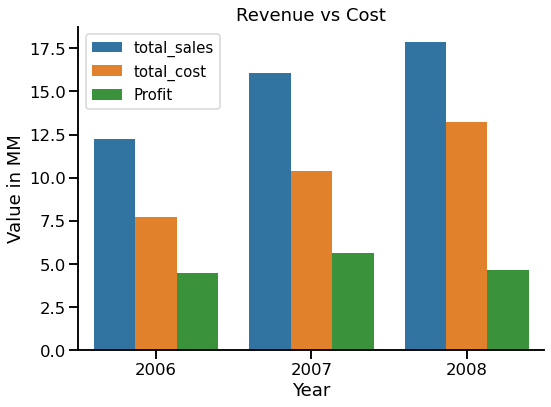

In [66]:
sns.set_context('talk')
plt.figure(figsize = (8,6))
ax = sns.barplot(x = 'order_yr', y = 'in_MM', hue = 'metric', data = yr_agg_melt)
# ax.bar_label(ax.containers[0])
sns.despine(right = True, top = True)

#  order = ['total_sales','total_cost','Profit'
plt.xlabel('Year')
plt.ylabel('Value in MM')
plt.title('Revenue vs Cost')

# plt.setp(ax.get_legend().get_texts(), fontsize='5') # for legend text
# plt.setp(ax.get_legend().get_title(), fontsize='6') # for legend title
plt.legend(loc='upper right')
plt.legend(fontsize='small', title_fontsize='5')


plt.tight_layout()
plt.show()

In [ ]:
# Total profit

In [67]:
a.Total_selling_price_mm.sum()

101.12078173500001

In [68]:
a.Profit_mm.sum()

33.892908252225006

In [70]:
a.Total_cost_mm.sum()

67.227873482775

In [46]:
#Filtering the data for Q2 performance
q2_data = a[(a['order_yr'].isin([2007,2008])) & (a['order_mnth'].isin([4,5,6]))]
q2_data.shape

(8799, 42)

In [47]:
q2_data

,SalesOrderNumber,OrderDate,DueDate,ShipDate,Sales_Person,Sales_Region,Sales_Province,Sales_City,Sales_Postal_Code,Customer_Code,Customer_Name,Customer_Region,Customer_Province,Customer_City,Customer_Postal_Code,LineItem_Id,Product_Category,Product_Sub_Category,Product_Name,Product_Code,Unit_Cost,UnitPrice,UnitPriceDiscount,OrderQty,Unit_Freight_Cost,Overall_cost,Overall_freight_cost,Overall_sales_price,Overall_discount,Total_cost,Total_selling_price,Profit,month_year,order_yr,order_mnth,mnth,Total_cost_mm,Total_selling_price_mm,Profit_mm,Total_cost_k,Total_selling_price_k,Profit_k
18446,SO49821,2007-04-01,00:00.0,00:00.0,Michael Blythe,United States,Michigan,Detroit,48226,AW00029772,Modular Cycle Systems,United States,Texas,Austin,78701,29155,Bikes,Road Bikes,"Road-650 Red, 62",BK-R50R-62,486.70660,782.99000,0.00000,4,67.23840,1946.82640,268.95360,3131.96000,0.00000,2215.78000,3131.96000,916.18000,2007-04,2007,4,Apr,0.00222,0.00313,0.00092,2.21578,3.13196,0.91618
18447,SO49821,2007-04-01,00:00.0,00:00.0,Michael Blythe,United States,Michigan,Detroit,48226,AW00029772,Modular Cycle Systems,United States,Texas,Austin,78701,29156,Bikes,Road Bikes,"Road-650 Red, 48",BK-R50R-48,486.70660,782.99000,0.00000,5,67.23840,2433.53300,336.19200,3914.95000,0.00000,2769.72500,3914.95000,1145.22500,2007-04,2007,4,Apr,0.00277,0.00391,0.00115,2.76972,3.91495,1.14522
18448,SO49821,2007-04-01,00:00.0,00:00.0,Michael Blythe,United States,Michigan,Detroit,48226,AW00029772,Modular Cycle Systems,United States,Texas,Austin,78701,29157,Bikes,Road Bikes,"Road-650 Black, 52",BK-R50B-52,486.70660,782.99000,0.00000,3,67.23840,1460.11980,201.71520,2348.97000,0.00000,1661.83500,2348.97000,687.13500,2007-04,2007,4,Apr,0.00166,0.00235,0.00069,1.66183,2.34897,0.68714
18449,SO49821,2007-04-01,00:00.0,00:00.0,Michael Blythe,United States,Michigan,Detroit,48226,AW00029772,Modular Cycle Systems,United States,Texas,Austin,78701,29158,Bikes,Road Bikes,"Road-650 Black, 48",BK-R50B-48,486.70660,782.99000,0.00000,2,67.23840,973.41320,134.47680,1565.98000,0.00000,1107.89000,1565.98000,458.09000,2007-04,2007,4,Apr,0.00111,0.00157,0.00046,1.10789,1.56598,0.45809
18450,SO49821,2007-04-01,00:00.0,00:00.0,Michael Blythe,United States,Michigan,Detroit,48226,AW00029772,Modular Cycle Systems,United States,Texas,Austin,78701,29159,Bikes,Road Bikes,"Road-650 Black, 58",BK-R50B-58,486.70660,782.99000,0.00000,3,67.23840,1460.11980,201.71520,2348.97000,0.00000,1661.83500,2348.97000,687.13500,2007-04,2007,4,Apr,0.00166,0.00235,0.00069,1.66183,2.34897,0.68714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41879,SO71952,2008-06-01,00:00.0,00:00.0,Michael Blythe,United States,Michigan,Detroit,48226,AW00030046,Extraordinary Bike Works,United States,Texas,Mesquite,75149,113559,Components,Mountain Frames,"LL Mountain Frame - Silver, 52",FR-M21S-52,180.74225,264.05000,0.00000,2,50.09910,361.48450,100.19820,528.10000,0.00000,461.68270,528.10000,66.41730,2008-06,2008,6,Jun,0.00046,0.00053,0.00007,0.46168,0.52810,0.06642
41880,SO71952,2008-06-01,00:00.0,00:00.0,Michael Blythe,United States,Michigan,Detroit,48226,AW00030046,Extraordinary Bike Works,United States,Texas,Mesquite,75149,113560,Components,Mountain Frames,"HL Mountain Frame - Black, 42",FR-M94B-42,923.80125,1349.60000,0.00000,1,50.09910,923.80125,50.09910,1349.60000,0.00000,973.90035,1349.60000,375.69965,2008-06,2008,6,Jun,0.00097,0.00135,0.00038,0.97390,1.34960,0.37570
41881,SO71952,2008-06-01,00:00.0,00:00.0,Michael Blythe,United States,Michigan,Detroit,48226,AW00030046,Extraordinary Bike Works,United States,Texas,Mesquite,75149,113561,Components,Mountain Frames,"HL Mountain Frame - Silver, 46",FR-M94S-46,934.00025,1364.50000,0.00000,4,50.09910,3736.00100,200.39640,5458.00000,0.00000,3936.39740,5458.00000,1521.60260,2008-06,2008,6,Jun,0.00394,0.00546,0.00152,3.93640,5.45800,1.52160
41882,SO71952,2008-06-01,00:0

In [48]:
q2_data.month_year.value_counts()

2008-05    1925
2008-06    1766
2007-05    1712
2007-06    1204
2008-04    1147
2007-04    1045
Freq: M, Name: month_year, dtype: int64

In [49]:
q2_data.head()

,SalesOrderNumber,OrderDate,DueDate,ShipDate,Sales_Person,Sales_Region,Sales_Province,Sales_City,Sales_Postal_Code,Customer_Code,Customer_Name,Customer_Region,Customer_Province,Customer_City,Customer_Postal_Code,LineItem_Id,Product_Category,Product_Sub_Category,Product_Name,Product_Code,Unit_Cost,UnitPrice,UnitPriceDiscount,OrderQty,Unit_Freight_Cost,Overall_cost,Overall_freight_cost,Overall_sales_price,Overall_discount,Total_cost,Total_selling_price,Profit,month_year,order_yr,order_mnth,mnth,Total_cost_mm,Total_selling_price_mm,Profit_mm,Total_cost_k,Total_selling_price_k,Profit_k
18446,SO49821,2007-04-01,00:00.0,00:00.0,Michael Blythe,United States,Michigan,Detroit,48226,AW00029772,Modular Cycle Systems,United States,Texas,Austin,78701,29155,Bikes,Road Bikes,"Road-650 Red, 62",BK-R50R-62,486.70660,782.99000,0.00000,4,67.23840,1946.82640,268.95360,3131.96000,0.00000,2215.78000,3131.96000,916.18000,2007-04,2007,4,Apr,0.00222,0.00313,0.00092,2.21578,3.13196,0.91618
18447,SO49821,2007-04-01,00:00.0,00:00.0,Michael Blythe,United States,Michigan,Detroit,48226,AW00029772,Modular Cycle Systems,United States,Texas,Austin,78701,29156,Bikes,Road Bikes,"Road-650 Red, 48",BK-R50R-48,486.70660,782.99000,0.00000,5,67.23840,2433.53300,336.19200,3914.95000,0.00000,2769.72500,3914.95000,1145.22500,2007-04,2007,4,Apr,0.00277,0.00391,0.00115,2.76972,3.91495,1.14522
18448,SO49821,2007-04-01,00:00.0,00:00.0,Michael Blythe,United States,Michigan,Detroit,48226,AW00029772,Modular Cycle Systems,United States,Texas,Austin,78701,29157,Bikes,Road Bikes,"Road-650 Black, 52",BK-R50B-52,486.70660,782.99000,0.00000,3,67.23840,1460.11980,201.71520,2348.97000,0.00000,1661.83500,2348.97000,687.13500,2007-04,2007,4,Apr,0.00166,0.00235,0.00069,1.66183,2.34897,0.68714
18449,SO49821,2007-04-01,00:00.0,00:00.0,Michael Blythe,United States,Michigan,Detroit,48226,AW00029772,Modular Cycle Systems,United States,Texas,Austin,78701,29158,Bikes,Road Bikes,"Road-650 Black, 48",BK-R50B-48,486.70660,782.99000,0.00000,2,67.23840,973.41320,134.47680,1565.98000,0.00000,1107.89000,1565.98000,458.09000,2007-04,2007,4,Apr,0.00111,0.00157,0.00046,1.10789,1.56598,0.45809
18450,SO49821,2007-04-01,00:00.0,00:00.0,Michael Blythe,United States,Michigan,Detroit,48226,AW00029772,Modular Cycle Systems,United States,Texas,Austin,78701,29159,Bikes,Road Bikes,"Road-650 Black, 58",BK-R50B-58,486.70660,782.99000,0.00000,3,67.23840,1460.11980,201.71520,2348.97000,0.00000,1661.83500,2348.97000,687.13500,2007-04,2007,4,Apr,0.00166,0.00235,0.00069,1.66183,2.34897,0.68714


In [71]:
q2_data_agg1 = q2_data.groupby(['order_yr','Product_Category']). \
agg({'Total_cost_k':np.sum,'Total_selling_price_k':np.sum,'Profit_k':np.sum}).reset_index()

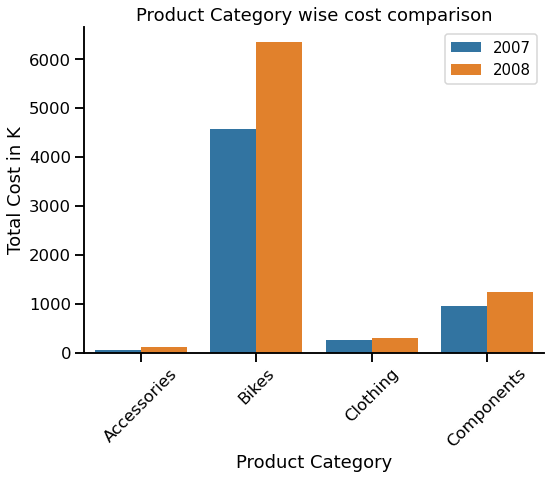

In [72]:
# sns.set_context('talk')
plt.figure(figsize = (8,7))
ax = sns.barplot(x = 'Product_Category', y = 'Total_cost_k', hue = 'order_yr', data = q2_data_agg1)
# ax.bar_label(ax.containers[0])
sns.despine(right = True, top = True)

plt.xlabel('Product Category')
plt.ylabel('Total Cost in K')
plt.title('Product Category wise cost comparison')


# plt.setp(ax.get_legend().get_texts(), fontsize='5') # for legend text
# plt.setp(ax.get_legend().get_title(), fontsize='6') # for legend title
plt.legend(loc='upper right')
plt.legend(fontsize='small', title_fontsize='5')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

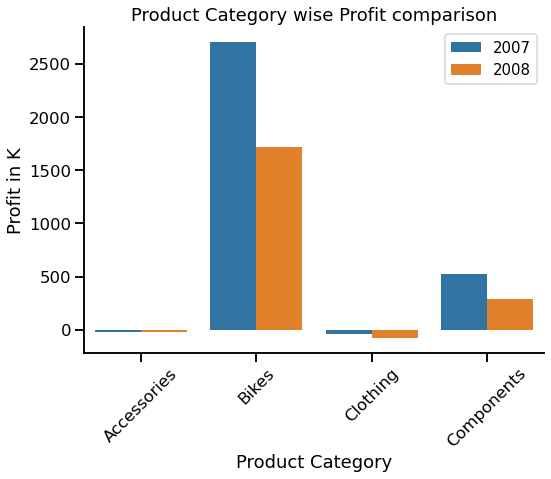

In [74]:
# sns.set_context('talk')
plt.figure(figsize = (8,7))
ax = sns.barplot(x = 'Product_Category', y = 'Profit_k', hue = 'order_yr', data = q2_data_agg1)
# ax.bar_label(ax.containers[0])
sns.despine(right = True, top = True)

plt.xlabel('Product Category')
plt.ylabel('Profit in K')
plt.title('Product Category wise Profit comparison')


# plt.setp(ax.get_legend().get_texts(), fontsize='5') # for legend text
# plt.setp(ax.get_legend().get_title(), fontsize='6') # for legend title
plt.legend(loc='upper right')
plt.legend(fontsize='small', title_fontsize='2')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

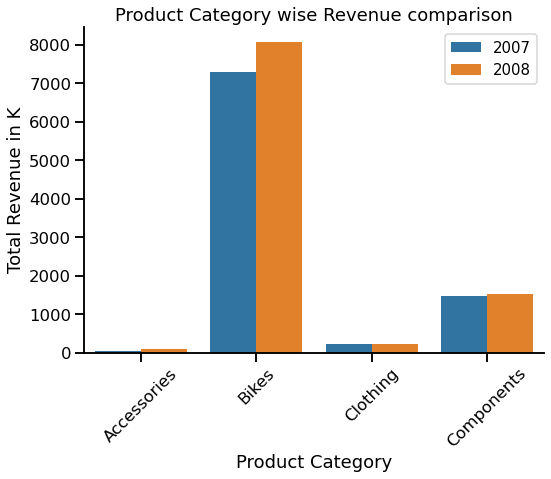

In [75]:
# sns.set_context('talk')
plt.figure(figsize = (8,7))
ax = sns.barplot(x = 'Product_Category', y = 'Total_selling_price_k', hue = 'order_yr', data = q2_data_agg1)
# ax.bar_label(ax.containers[0])
sns.despine(right = True, top = True)

plt.xlabel('Product Category')
plt.ylabel('Total Revenue in K')
plt.title('Product Category wise Revenue comparison')


# plt.setp(ax.get_legend().get_texts(), fontsize='5') # for legend text
# plt.setp(ax.get_legend().get_title(), fontsize='6') # for legend title
plt.legend(loc='upper right')
plt.legend(fontsize='small', title_fontsize='2')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [50]:
#Distribution of Product categories
q2_data.groupby(['order_yr','Product_Category']).agg({'Total_cost':np.sum,'Total_selling_price':np.sum,'Profit':np.sum}).reset_index()

,order_yr,Product_Category,Total_cost,Total_selling_price,Profit
0,2007,Accessories,61763.01940,39736.88000,-22026.13940
1,2007,Bikes,4566253.95660,7277379.61000,2711125.65340
2,2007,Clothing,263506.96170,226756.39000,-36750.57170
3,2007,Components,948472.40180,1473686.22000,525213.81820
4,2008,Accessories,123973.85600,100518.40000,-23455.45600
5,2008,Bikes,6342450.52140,8061081.91000,1718631.38860
6,2008,Clothing,312109.65713,233847.47000,-78262.18713
7,2008,Components,1241677.03455,1533223.96000,291546.92545


In [51]:
#Distribution of Sales_Region
q2_data.groupby(['order_yr','Sales_Region']).agg({'Total_cost':np.sum,'Total_selling_price':np.sum,'Profit':np.sum}).reset_index()

,order_yr,Sales_Region,Total_cost,Total_selling_price,Profit
0,2007,France,355843.39900,548753.23500,192909.83600
1,2007,United States,5484152.94050,8468805.86500,2984652.92450
2,2008,France,959390.71150,1170633.93000,211243.21850
3,2008,United States,7060820.35758,8758037.81000,1697217.45242


In [52]:
#Distribution of Sales_Region & Sales person
q2_data.groupby(['order_yr','Sales_Region','Sales_Person']).agg({'Total_cost':np.sum,'Total_selling_price':np.sum,'Profit':np.sum}).reset_index()

,order_yr,Sales_Region,Sales_Person,Total_cost,Total_selling_price,Profit
0,2007,France,Ranjit Varkey Chudukatil,355843.39900,548753.23500,192909.83600
1,2007,United States,David Campbell,306159.08730,471265.78000,165106.69270
2,2007,United States,Jillian Carson,1221764.85230,1887293.40000,665528.54770
3,2007,United States,Linda Mitchell,1113697.44630,1722831.09500,609133.64870
4,2007,United States,Michael Blythe,1186246.26410,1812874.08000,626627.81590
5,2007,United States,Pamela Ansman-Wolfe,89169.39450,145298.23500,56128.84050
6,2007,United States,Shu Ito,601000.53380,927177.40000,326176.86620
7,2007,United States,Stephen Jiang,58488.82870,87236.92000,28748.09130
8,2007,United States,Tete Mensa-Annan,304291.99400,466270.26000,161978.26600
9,2007,United States,Tsvi Reiter,603334.53950,948558.69500,345224.15550


In [53]:
#Distribution of Sales_Region & Sales_Person
q2_data.groupby(['order_yr','Sales_Region','Sales_Province','Sales_City','Sales_Postal_Code','Sales_Person']).agg({'Total_cost':np.sum,'Total_selling_price':np.sum,'Profit':np.sum}).reset_index()

,order_yr,Sales_Region,Sales_Province,Sales_City,Sales_Postal_Code,Sales_Person,Total_cost,Total_selling_price,Profit
0,2007,France,Gironde,Bordeaux,33000,Ranjit Varkey Chudukatil,355843.39900,548753.23500,192909.83600
1,2007,United States,California,San Francisco,94109,Shu Ito,601000.53380,927177.40000,326176.86620
2,2007,United States,Massachusetts,Cambridge,2139,Tete Mensa-Annan,304291.99400,466270.26000,161978.26600
3,2007,United States,Michigan,Detroit,48226,Michael Blythe,1186246.26410,1812874.08000,626627.81590
4,2007,United States,Minnesota,Duluth,55802,Jillian Carson,1221764.85230,1887293.40000,665528.54770
5,2007,United States,Oregon,Portland,97205,Pamela Ansman-Wolfe,89169.39450,145298.23500,56128.84050
6,2007,United States,Tennessee,Memphis,38103,Tsvi Reiter,603334.53950,948558.69500,345224.15550
7,2007,United States,Utah,Nevada,84407,Linda Mitchell,1113697.44630,1722831.09500,609133.64870
8,2007,United States,Washington,Bellevue,98004,David Campbell,306159.08730,471265.78000,165106.69270
9,2007,United States,Washington,Redmond,98052,Stephen Jiang,58488.82870,87236.92000,28748.09130


In [54]:
#Distribution of Customers
Customer_name =q2_data.groupby(['order_yr','Customer_Name']).agg({'Total_cost':np.sum,'Total_selling_price':np.sum,'Profit':np.sum}).reset_index()

In [277]:
Customer_name.to_csv('Customer_name.csv')

In [278]:
pwd()

'C:\\Users\\Pragya\\Doodle'

In [55]:
#Distribution of Product subcategories
q2_data.groupby(['order_yr','Product_Category','Product_Sub_Category']).agg({'Total_cost':np.sum,'Total_selling_price':np.sum,'Profit':np.sum}).reset_index()

,order_yr,Product_Category,Product_Sub_Category,Total_cost,Total_selling_price,Profit
0,2007,Accessories,Helmets,43850.85260,31099.14000,-12751.71260
1,2007,Accessories,Locks,8700.52530,4599.76000,-4100.76530
2,2007,Accessories,Pumps,9211.64150,4037.98000,-5173.66150
3,2007,Bikes,Mountain Bikes,1668883.24120,2925938.94000,1257055.69880
4,2007,Bikes,Road Bikes,2897370.71540,4351440.67000,1454069.95460
5,2007,Clothing,Bib-Shorts,39065.12180,49223.17000,10158.04820
6,2007,Clothing,Caps,13836.78310,3252.78000,-10584.00310
7,2007,Clothing,Gloves,81119.22850,52070.72000,-29048.50850
8,2007,Clothing,Jerseys,53840.02720,37490.27000,-16349.75720
9,2007,Clothing,Shorts,24245.07410,24355.94000,110.86590
